In [1]:
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file

# For visvalization
import matplotlib.pyplot as plt
import seaborn as sns
# import geopandas as gpd

%matplotlib inline

In [2]:
df_ts = pd.read_csv('../normalized_filled_clean_data/normalized-filled-clean-world-happiness-report.csv')

In [3]:
df_ts

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2006,0.241065,0.139235,0.229885,0.412946,0.632737,0.486931,0.893460
1,Afghanistan,2007,0.241065,0.139235,0.229885,0.412946,0.632737,0.486931,0.893460
2,Afghanistan,2008,0.241065,0.139235,0.229885,0.412946,0.632737,0.486931,0.893460
3,Afghanistan,2009,0.362223,0.173441,0.375000,0.421875,0.579092,0.508228,0.859705
4,Afghanistan,2010,0.425840,0.194970,0.356322,0.430804,0.470426,0.441433,0.708861
...,...,...,...,...,...,...,...,...,...
2250,Zimbabwe,2017,0.225697,0.269215,0.665230,0.506696,0.680880,0.229429,0.755274
2251,Zimbabwe,2018,0.221766,0.275855,0.695402,0.520089,0.694635,0.258470,0.853376
2252,Zimbabwe,2019,0.057005,0.255936,0.672414,0.533482,0.514443,0.262343,0.839662
2253,Zimbabwe,2020,0.140279,0.231590,0.612069,0.546875,0.529574,0.315586,0.795359


In [4]:
#2006 - 2021
init = 2006
years = []
for i in range(16):
    years.append(init)
    init += 1

In [5]:
##Average Value of Life Ladder according to year
avg_dict = {}
for year in years:
    avg_dict[year] = df_ts[df_ts['year'] == year]['Life Ladder'].mean()
    
avg_dict

{2006: 0.5279125413796076,
 2007: 0.5424333194767625,
 2008: 0.5428721460955732,
 2009: 0.5486183984845637,
 2010: 0.5488680702359168,
 2011: 0.5552298416464307,
 2012: 0.5462519031662262,
 2013: 0.5440575377211347,
 2014: 0.5481518587238099,
 2015: 0.5444899852478217,
 2016: 0.5473950913942245,
 2017: 0.5612078113884115,
 2018: 0.5695678017226083,
 2019: 0.5744997693387878,
 2020: 0.5728997156023298,
 2021: 0.5737095374246909}

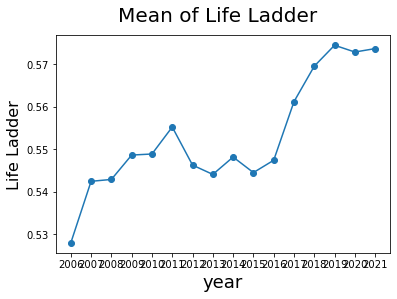

In [6]:
##
fig = plt.figure()
fig.suptitle('Mean of Life Ladder', fontsize=20)
plt.xlabel('year', fontsize=18)
plt.ylabel('Life Ladder', fontsize=16)
plt.scatter(range(len(avg_dict)), list(avg_dict.values()))
plt.plot(range(len(avg_dict)), list(avg_dict.values()))
plt.xticks(range(len(avg_dict)), list(avg_dict.keys()))
plt.show()

Averge Data to Pandas Series

In [7]:
##https://stackoverflow.com/questions/36038927/whats-the-difference-between-pandas-acf-and-statsmodel-acf
avg = []

for a in avg_dict.values():
    avg.append(a)

avg = pd.Series(avg)
#acf = [avg.autocorr(i) for i in range(len(avg)-1)]
#print(acf)
#acf = pd.DataFrame(acf)
#acf.plot(kind='bar')

ACF Plot

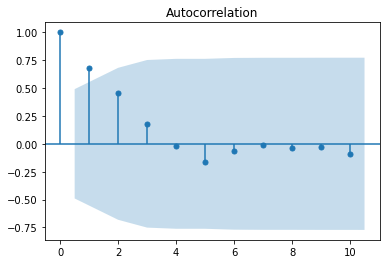

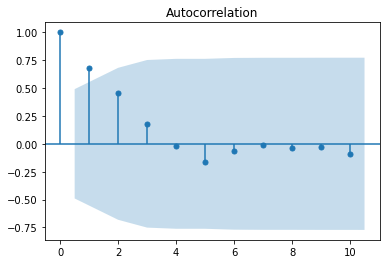

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(avg, lags=10)

PCAF Plot

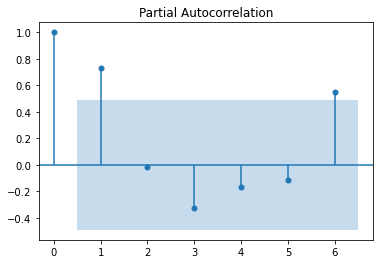

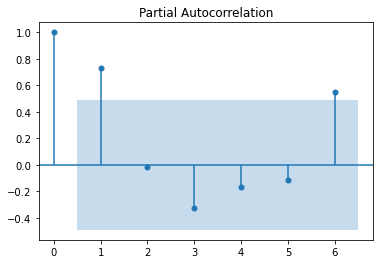

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(avg, lags=6)

The parameters of the ARIMA model are defined as follows:

p: The number of lag observations included in the model, also called the lag order.
d: The number of times that the raw observations are differenced, also called the degree of differencing.
q: The size of the moving average window, also called the order of moving average.

In [10]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(avg, order=(2,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:                 ARIMA(2, 1, 0)   Log Likelihood                  54.037
Date:                Wed, 23 Jun 2021   AIC                           -102.073
Time:                        01:54:45   BIC                            -99.949
Sample:                             0   HQIC                          -102.096
                                 - 16                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2145      0.363      0.591      0.554      -0.496       0.925
ar.L2          0.1325      0.407      0.325      0.745      -0.666       0.931
sigma2       4.32e-05   1.64e-05      2.631      0.0

C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Line Plot of Residual:

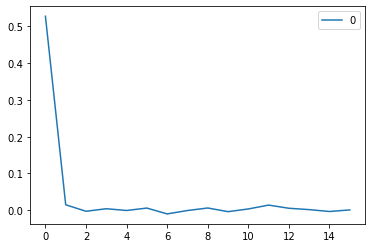

In [11]:
from pandas import DataFrame
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

In [12]:
residuals

,0
0,0.527913
1,0.014521
2,-0.003151
3,0.003728
4,-0.001041
5,0.005547
6,-0.010375
7,-0.001112
8,0.005754
9,-0.004249


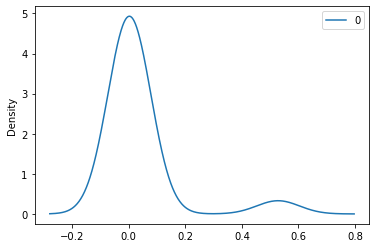

In [13]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [14]:
# summary stats of residuals
print(residuals.describe())

               0
count  16.000000
mean    0.034838
std     0.131640
min    -0.010375
25%    -0.001622
50%     0.002229
75%     0.005599
max     0.527913


In [15]:
X = avg.values

In [16]:
X

array([0.52791254, 0.54243332, 0.54287215, 0.5486184 , 0.54886807,
       0.55522984, 0.5462519 , 0.54405754, 0.54815186, 0.54448999,
       0.54739509, 0.56120781, 0.5695678 , 0.57449977, 0.57289972,
       0.57370954])

predicted=0.546250, expected=0.547395


C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


predicted=0.545834, expected=0.561208
predicted=0.559897, expected=0.569568
predicted=0.573769, expected=0.574500
predicted=0.577190, expected=0.572900
predicted=0.573184, expected=0.573710
Test RMSE: 0.008


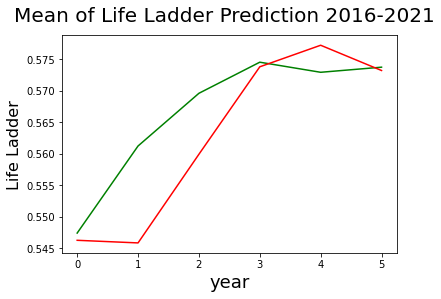

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# split into train and test sets
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
fig = plt.figure()
fig.suptitle('Mean of Life Ladder Prediction 2016-2021', fontsize=20)
plt.xlabel('year', fontsize=18)
plt.ylabel('Life Ladder', fontsize=16)
plt.plot(test, color='green')
plt.plot(predictions, color='red')
plt.show()